In [1]:
import numpy as np

## Eigenvals and Eigenvectors ##

In [2]:
a = np.array([[2, 2, 4], [1, 3, 5], [ 2, 3, 4]])

In [3]:
w, v = np.linalg.eig(a)

In [4]:
print ('Eigenvalues: ', w)

Eigenvalues:  [ 8.80916362  0.92620912 -0.73537273]


In [5]:
print ('Eigenvectors: ', v)

Eigenvectors:  [[-0.52799324 -0.77557092 -0.36272811]
 [-0.604391    0.62277013 -0.7103262 ]
 [-0.59660259 -0.10318482  0.60321224]]


## Singular Value Decomposition ## 

In [6]:
u, s, v_t = np.linalg.svd(a)

In [7]:
print(u)

[[-0.52157957  0.51176432 -0.68268004]
 [-0.62993653 -0.7706383  -0.09641875]
 [-0.57544307  0.37975505  0.72432823]]


In [8]:
print(s)

[ 9.30064272  1.06283875  0.60697515]


In [9]:
print(v_t)

[[-0.30363297 -0.50096516 -0.81045724]
 [ 0.95254376 -0.14030457 -0.27013886]
 [-0.02161931  0.85401905 -0.51979233]]


Let's recreate the original matrix from U, S, V

In [10]:
sigma = np.zeros((a.shape[0], a.shape[1]))
sigma

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [11]:
sigma[:a.shape[1],:a.shape[1]] = np.diag(s)

In [12]:
sigma

array([[ 9.30064272,  0.        ,  0.        ],
       [ 0.        ,  1.06283875,  0.        ],
       [ 0.        ,  0.        ,  0.60697515]])

In [13]:
np.diag(s)

array([[ 9.30064272,  0.        ,  0.        ],
       [ 0.        ,  1.06283875,  0.        ],
       [ 0.        ,  0.        ,  0.60697515]])

In [14]:
b0 = np.dot(u,sigma)

In [15]:
b = np.dot(b0,v_t)

In [16]:
b

array([[ 2.,  2.,  4.],
       [ 1.,  3.,  5.],
       [ 2.,  3.,  4.]])

## SVD allows us to find the pseuo-inverse as well ##

In [17]:
s_plus = 1.0/s #Find the reciprocals of the eigevalues

In [18]:
sigma_plus = np.zeros(a.shape)

In [19]:
sigma_plus[:a.shape[1],:a.shape[1]] = np.diag(s_plus)

In [20]:
a_pinv0 = np.dot(v_t.T,sigma_plus.T) 
a_pinv0

array([[-0.03264645,  0.89622604, -0.03561811],
       [-0.0538635 , -0.13200927,  1.40700827],
       [-0.08713992, -0.25416731, -0.85636509]])

In [21]:
a_pinv = np.dot(a_pinv0,u.T) 

In [22]:
a_pinv

array([[  5.00000000e-01,  -6.66666667e-01,   3.33333333e-01],
       [ -1.00000000e+00,   2.22044605e-16,   1.00000000e+00],
       [  5.00000000e-01,   3.33333333e-01,  -6.66666667e-01]])

In [23]:
np.linalg.pinv(a)

array([[  5.00000000e-01,  -6.66666667e-01,   3.33333333e-01],
       [ -1.00000000e+00,   2.22044605e-16,   1.00000000e+00],
       [  5.00000000e-01,   3.33333333e-01,  -6.66666667e-01]])

In [24]:
np.linalg.inv(a)

array([[ 0.5       , -0.66666667,  0.33333333],
       [-1.        ,  0.        ,  1.        ],
       [ 0.5       ,  0.33333333, -0.66666667]])

## k-means Clustering ##

* Limited to linear cluster boundaries <br>
* Under the hood - uses some form of expectation-maximization (EM) <br>
* Unsupervised but needs the # of clusters to be specified <br>
* Slow for a large number of samples <br>

In [28]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [29]:
from sklearn.datasets.samples_generator import make_blobs

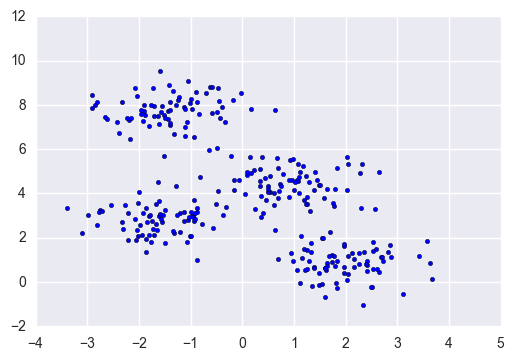

In [48]:
#X will store the coordinates (both axes) and y_true tells you which cluster it is in

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=10);
plt.show()

In [51]:
#X has both coordinates from the blobs above. y_kmeans is the predicted cluster for those points

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

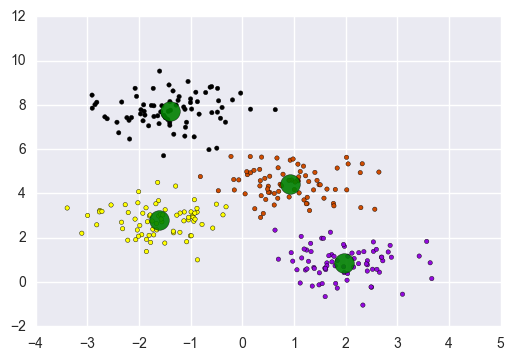

In [52]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='gnuplot')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200, alpha=0.9);
plt.show()

Let's break it ...

In [71]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.06, random_state=0)

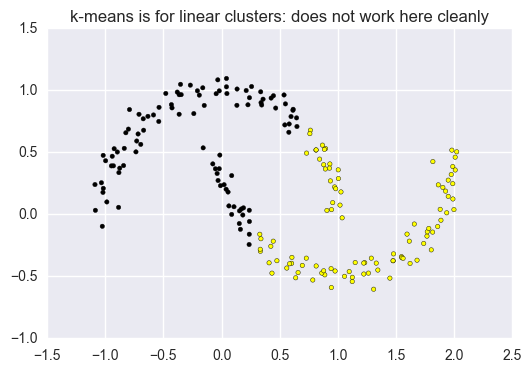

In [72]:
kmeans2 = KMeans(n_clusters= 2, random_state=0)
kmeans2.fit(X)
y_kmeans2 = kmeans2.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans2, s=10, cmap='gnuplot')
plt.title('k-means is for linear clusters: does not work here cleanly')
plt.show()

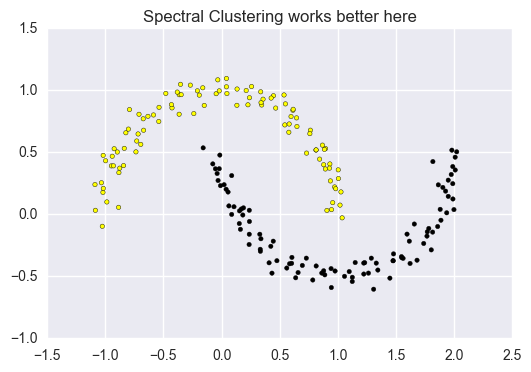

In [74]:
from sklearn.cluster import SpectralClustering
kmeans3 = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',assign_labels='kmeans')

y_kmeans3 = kmeans3.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans3,s=10, cmap='gnuplot')
plt.title('Spectral Clustering works better here')
plt.show()